# Simulation Setup

Fix a compact and convex $d$-dimensional domain $W \subset \mathbb{R}^d$ and suppose the data set $\mathcal{D}_n := \{(X_1, Y_1), \ldots, (X_n,Y_n)\}$ consists of $n$ i.i.d. samples from a random pair $(X,Y) \in W \times \mathbb{R}$ such that $\mathbb{E}[Y^2] < \infty$.  Let $\mu$ denote the unknown distribution of $X$ and assume
$$Y = f(X) + \varepsilon,$$
for some unknown function $f: \mathbb{R}^d \to \mathbb{R}$ and $\varepsilon$ is noise such that $\mathbb{E}[\varepsilon|X] = 0$ and $\mathrm{Var}(\varepsilon|X) = \sigma^2 < \infty$ almost surely. 

We make the additional assumption on the function $f$, that it is of the form
$$f(x) = g(Ax), \quad x \in \mathbb{R}^d,$$
where $g:\mathbb{R}^s \to \mathbb{R}$ and $A \in \mathbb{R}^{s \times d}$ for $s \leq d$. This is a general dimensionality reduction model often referred to as a \emph{multi-index model} or \emph{ridge function}, where the regression function depends only on the inputs $\langle a_1, X \rangle, \ldots, \langle a_s, X \rangle$, where $\{a_i\}_{i=1}^s$ are the rows of $A$. Let $S := \mathrm{span}(\{a_i\}_{i=1}^s)$ denote the associated \emph{relevant feature subspace}. An equivalent assumption is that
\[f(x) = \tilde{g}(P_S x),\]
where $P_S$ is the orthogonal projection onto $S$.

In this notebook, we will simulate the effectiveness of our proposed method with the following parameters:

- Total dimension: $d = 5$
- Active dimension: $s = 2$
- Number of Mondrian trees: $T = 10$
- Number of repeated experiments: $R = 10$
- Step size used for finite difference method: $t = 0.1$
- Number of training samples: $n = 100, 200, 400, 800, 1600$
- Number of test samples: $m = 1000$
- Each $X_i \sim U[-1,1]^d$
- The noise: $\varepsilon \sim \mathcal(0, \sigma^2 = 0.01)$

In [1]:
from utils import *

dim_in = 5
active = 2
tries = 10
lifetime = 5
step_size = 0.2 # in the implementation, this will be divided by 2
n_estimators = 10
sample_range = [100, 200, 400, 800, 1600]

np.random.seed(0)
x_train = np.random.rand(1600, dim_in) * 2 - 1
x_test = np.random.rand(1000, dim_in) * 2 - 1

# First Scenario

In this scenario, we have 
$$A = \begin{bmatrix}
    1 & 1 & 1 & 0 & 0\\
    1 & 1 & 0 & 1 & 1
    \end{bmatrix}$$
and 
$$g(x) = x_1^4 + x_2^4$$

In [2]:
fn = SimulatedData(dim_in, active, rotation="simple", fun="poly")

# In our implementation, we actually transform the data by first computing x @ fn.rotation and the projecting to the first two coordinates
fn.rotation

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.]])

In [3]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[0.4838726 , 0.57836497, 0.4838726 , 0.09449238, 0.09449238],
       [0.57836497, 1.1027387 , 0.57836497, 0.5243737 , 0.5243737 ],
       [0.4838726 , 0.57836497, 0.4838726 , 0.09449238, 0.09449238],
       [0.09449238, 0.5243737 , 0.09449238, 0.42988142, 0.42988136],
       [0.09449238, 0.5243737 , 0.09449238, 0.42988142, 0.42988142]],      dtype=float32)

In [4]:
simulation = Simulation(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

Training the Mondrian Forests:


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [02:21<00:00, 14.20s/it]


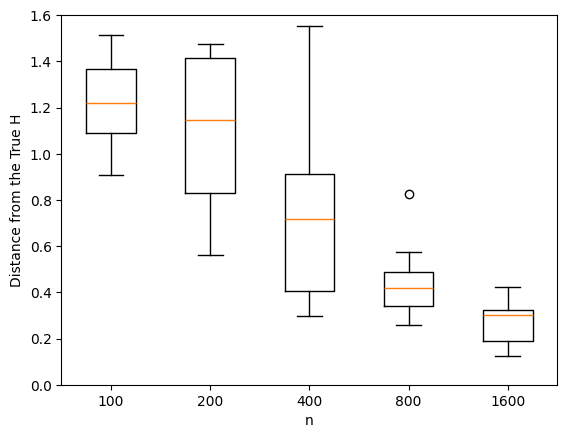

In [5]:
simulation.train()
plt.savefig("figures/dist_to_true_H_1.png")

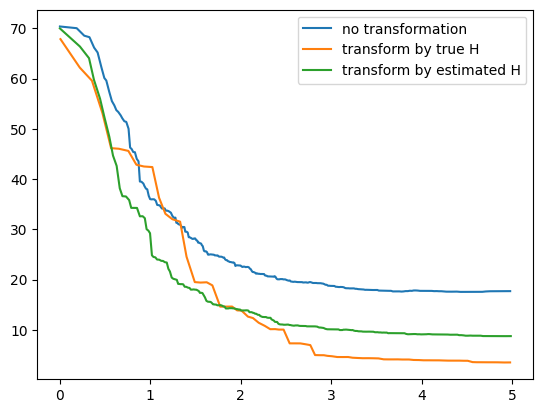

In [6]:
simulation.evaluation_comparison()
plt.savefig("figures/evaluation_comparison_1.png")

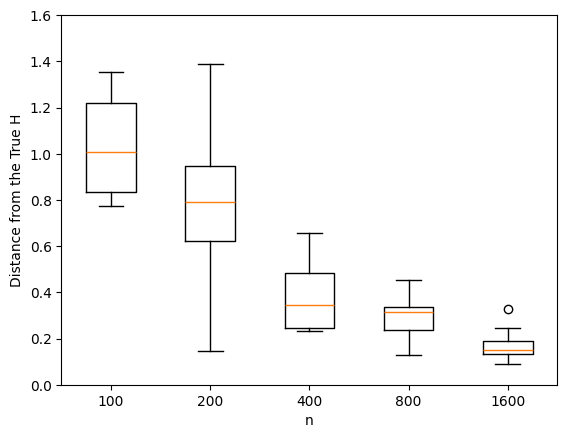

In [7]:
simulation.reiterate()
plt.savefig("figures/dist_to_true_H_reiterate_1.png")

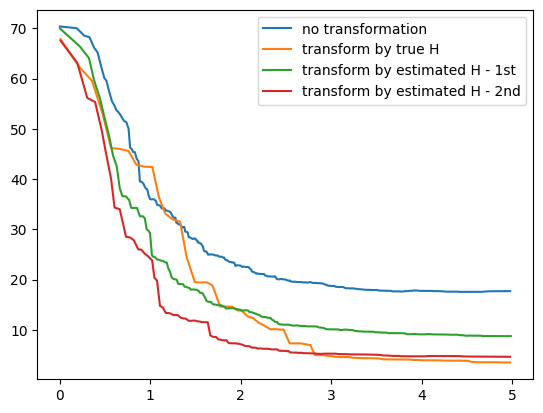

In [8]:
simulation.evaluation_comparison_reiterate()
plt.savefig("figures/evaluation_comparison_reiterate_1.png")

# Second Scenario

In this scenario, we have 
$$A = \begin{bmatrix}
    1 & 1 & 1 & 0 & 0\\
    1 & 1 & 0 & 1 & 1
    \end{bmatrix}$$
and 
$$g(x) = \exp(-0.25 * \min(x_1^2, x_2^2))$$

In [9]:
fn = SimulatedData(dim_in, active, rotation="simple", fun="max")

fn.rotation

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.]])

In [10]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[0.5253097 , 0.5253097 , 0.5253097 , 0.        , 0.        ],
       [0.5253097 , 1.0248972 , 0.5253097 , 0.4995876 , 0.4995876 ],
       [0.5253097 , 0.5253097 , 0.5253097 , 0.        , 0.        ],
       [0.        , 0.4995876 , 0.        , 0.4995876 , 0.4995876 ],
       [0.        , 0.49958757, 0.        , 0.49958757, 0.49958757]],      dtype=float32)

In [11]:
simulation = Simulation(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

Training the Mondrian Forests:


100%|██████████| 10/10 [02:22<00:00, 14.28s/it]


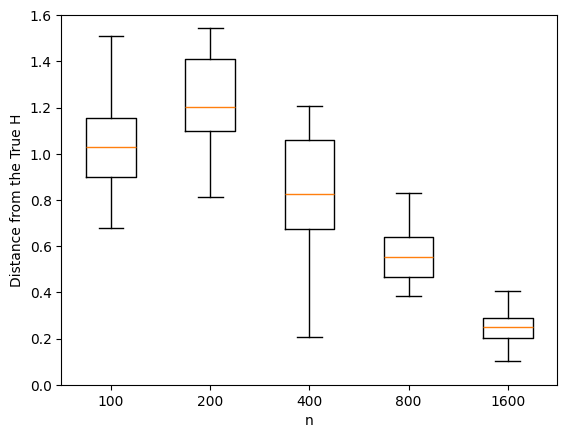

In [12]:
simulation.train()
plt.savefig("figures/dist_to_true_H_2.png")

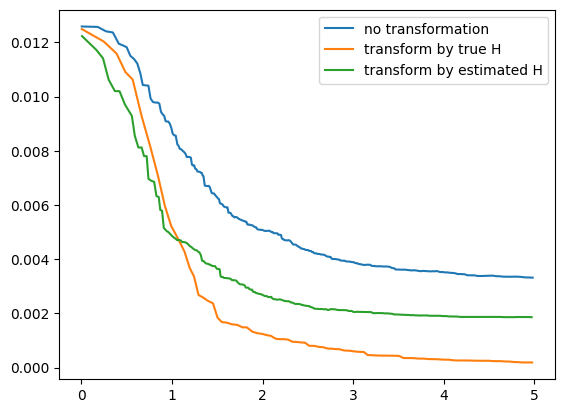

In [13]:
simulation.evaluation_comparison()
plt.savefig("figures/evaluation_comparison_2.png")

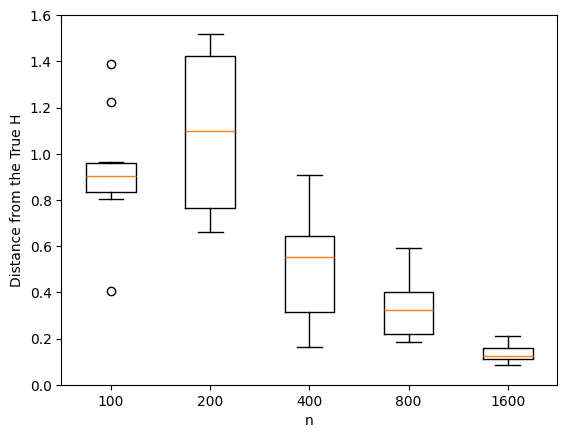

In [14]:
simulation.reiterate()
plt.savefig("figures/dist_to_true_H_reiterate_2.png")

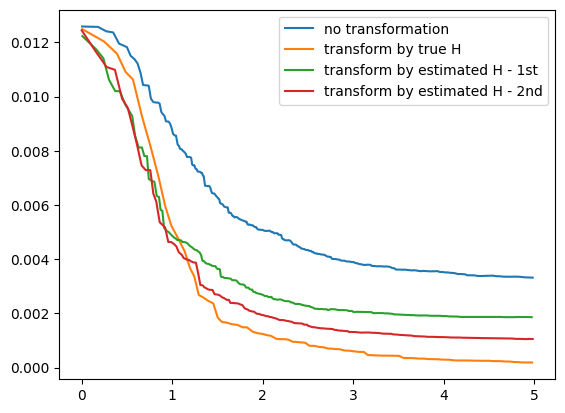

In [15]:
simulation.evaluation_comparison_reiterate()
plt.savefig("figures/evaluation_comparison_reiterate_2.png")

# Third Scenario

In this scenario, $A$ contains the first two rows of a random matrix from the orthogonal group $O(5)$. Specifically, we have
$$A = \begin{bmatrix}
    -0.49424072 &  0.11211344 & -0.27421644 & -0.62783889 &  0.52324025\\
    -0.0014017 &  0.71072528 &  0.69059226 & -0.11064719 &  0.07554563\\
    \end{bmatrix}$$
and 
$$g(x) = x_1^4 + x_2^4$$

In [16]:
fn = SimulatedData(dim_in, active, rotation="orth", fun="poly")

fn.rotation

array([[-0.49424072, -0.0014017 ,  0.64179662,  0.50954264,  0.29015089],
       [ 0.11211344,  0.71072528,  0.05636545, -0.31210644,  0.61782899],
       [-0.27421644,  0.69059226, -0.11049987,  0.22785387, -0.6194837 ],
       [-0.62783889, -0.11064719,  0.16804883, -0.73744735, -0.14665107],
       [ 0.52324025,  0.07554563,  0.7378817 , -0.21727838, -0.35893342]])

In [17]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[ 0.456188  , -0.09819335,  0.2582504 ,  0.5786899 , -0.48240352],
       [-0.09819335,  0.651014  ,  0.557411  , -0.22108744,  0.16950251],
       [ 0.2582504 ,  0.557411  ,  0.74276865,  0.23366012, -0.20918453],
       [ 0.5786899 , -0.22108744,  0.23366012,  0.7488796 , -0.622008  ],
       [-0.48240364,  0.16950248, -0.20918456, -0.622008  ,  0.5169714 ]],      dtype=float32)

In [18]:
simulation = Simulation(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

Training the Mondrian Forests:


100%|██████████| 10/10 [02:22<00:00, 14.30s/it]


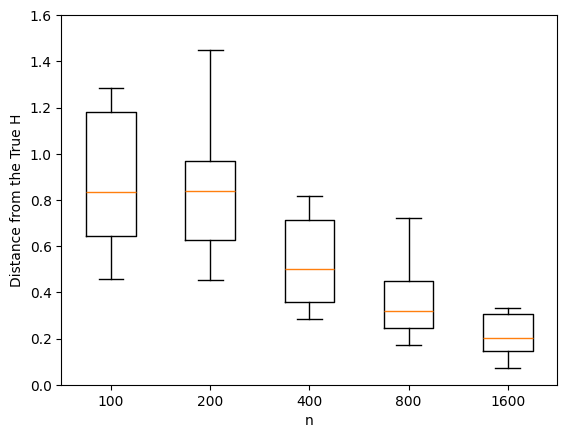

In [19]:
simulation.train()
plt.savefig("figures/dist_to_true_H_3.png")

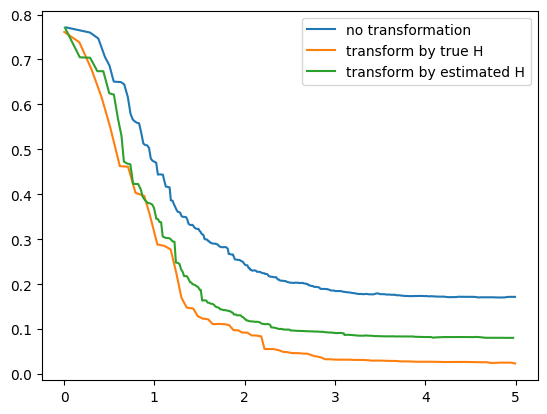

In [20]:
simulation.evaluation_comparison()
plt.savefig("figures/evaluation_comparison_3.png")

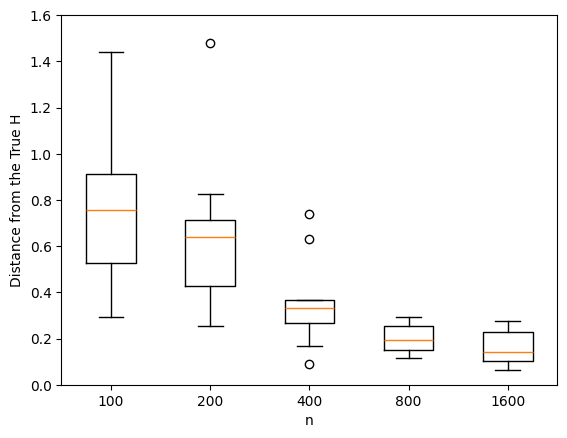

In [21]:
simulation.reiterate()
plt.savefig("figures/dist_to_true_H_reiterate_3.png")

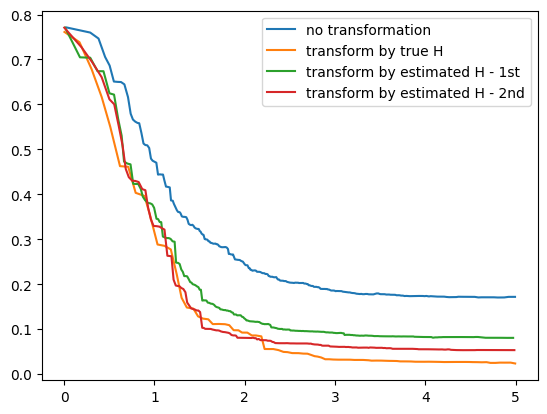

In [22]:
simulation.evaluation_comparison_reiterate()
plt.savefig("figures/evaluation_comparison_reiterate_3.png")

# Fourth Scenario

In this scenario, $A$ contains the first two rows of a random matrix from the orthogonal group $O(5)$. Specifically, we have
$$A = \begin{bmatrix}
    -0.49424072 &  0.11211344 & -0.27421644 & -0.62783889 &  0.52324025\\
    -0.0014017 &  0.71072528 &  0.69059226 & -0.11064719 &  0.07554563\\
    \end{bmatrix}$$
and 
$$g(x) = \exp(-0.25 * \min(x_1^2, x_2^2))$$

In [2]:
fn = SimulatedData(dim_in, active, rotation="orth", fun="max")

fn.rotation

array([[-0.49424072, -0.0014017 ,  0.64179662,  0.50954264,  0.29015089],
       [ 0.11211344,  0.71072528,  0.05636545, -0.31210644,  0.61782899],
       [-0.27421644,  0.69059226, -0.11049987,  0.22785387, -0.6194837 ],
       [-0.62783889, -0.11064719,  0.16804883, -0.73744735, -0.14665107],
       [ 0.52324025,  0.07554563,  0.7378817 , -0.21727838, -0.35893342]])

In [3]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[ 0.37240133, -0.08616582,  0.20497195,  0.47332415, -0.3944282 ],
       [-0.08616582,  0.8766575 ,  0.7863362 , -0.24080564,  0.18057756],
       [ 0.20497195,  0.7863362 ,  0.92423725,  0.13275029, -0.1301739 ],
       [ 0.47332415, -0.24080564,  0.13275029,  0.6217169 , -0.51500756],
       [-0.39442813,  0.18057762, -0.1301739 , -0.51500756,  0.42706928]],      dtype=float32)

In [4]:
simulation = Simulation(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

Training the Mondrian Forests:


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [02:14<00:00, 13.48s/it]


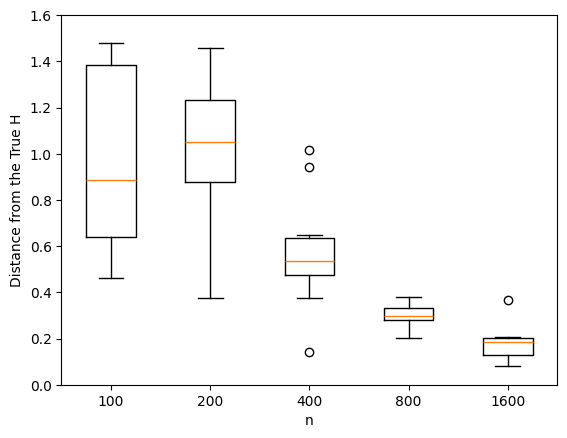

In [5]:
simulation.train()
plt.savefig("figures/dist_to_true_H_4.png")

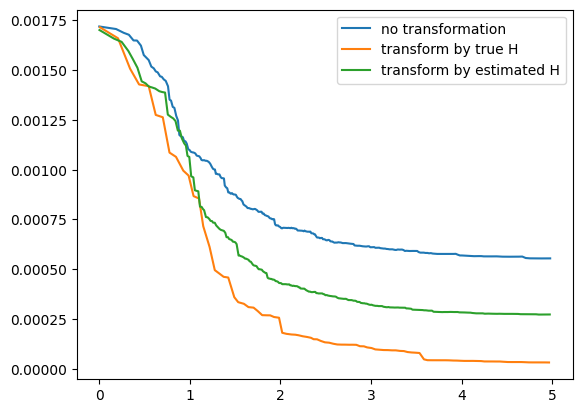

In [6]:
simulation.evaluation_comparison()
plt.savefig("figures/evaluation_comparison_4.png")

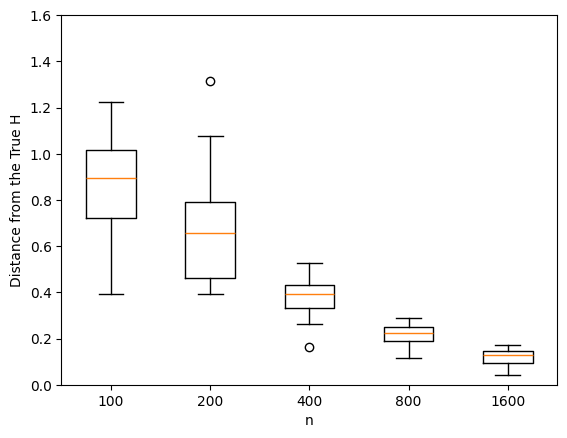

In [7]:
simulation.reiterate()
plt.savefig("figures/dist_to_true_H_reiterate_4.png")

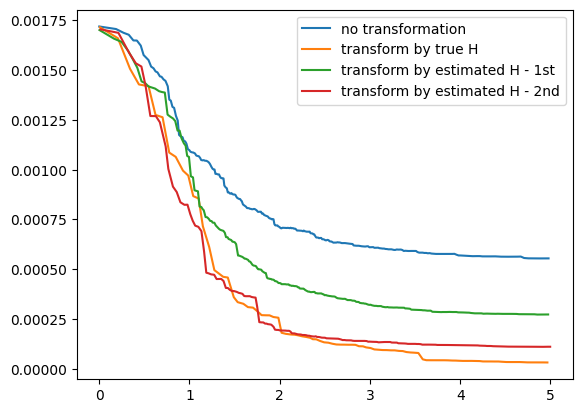

In [8]:
simulation.evaluation_comparison_reiterate()
plt.savefig("figures/evaluation_comparison_reiterate_4.png")